# Truncated sphere simulation results: 

We decided to run the simulation we set up from the "$\texttt{_ SETTINGS}$" notebook for $1 \cdot T_{coll} \sim 1.11$. 

As for the previous $\textit{hands-on}$ session, we produced some plots and animations to better understand the result. 

Here there are just some code pieces to get the data from the output files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fname = 'output.txt'

N = 1000

In [2]:
data = pd.read_csv(fname, header=None).to_numpy()

In [3]:
N = 1000

# take only the paired components every 3N+3 rows
# index 1: times
#index i: masses
# index i + N : positions
#index i + 2N : velocities

times = data[2::(3 * N + 3)].astype(float)

m = {}

for i in range(3, N + 3): # start from index==2 because we care about m_s, x_s and v_s 
    
    m[f"{i}_ms"]= data[i::(3 * N + 3)]
    m[f"{i}_xs"]= data[(i + N)::(3 * N + 3)]
    m[f"{i}_vs"]= data[(i + 2 * N)::(3 * N + 3)] 

In [4]:
len(m)

3000

In [5]:
m_data = {} # define a dictionary to order variables

for j in range(3, N + 3):

    m_data[f"{j - 3}_ms"] = np.array([m[f"{j}_ms"][i][0].split() for i in range(0, len(m[f"{j}_ms"]))]).astype(float)
    m_data[f"{j - 3}_xs"] = np.array([m[f"{j}_xs"][i][0].split() for i in range(0, len(m[f"{j}_xs"]))]).astype(float)
    m_data[f"{j - 3}_vs"] = np.array([m[f"{j}_xs"][i][0].split() for i in range(0, len(m[f"{j}_vs"]))]).astype(float)
        

In [6]:
times_plot = np.hstack(times) # create array from the previous times

Finally getting to the actual 3D plot:

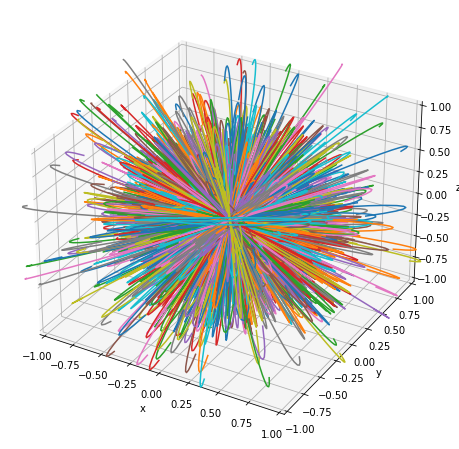

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

for i in range(0, N):

    ax.plot(m_data[f"{i}_xs"][:, 0], m_data[f"{i}_xs"][:, 1], m_data[f"{i}_xs"][:, 2], label=f"{i}th particle", linestyle='-')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

#plt.legend()

Let's see some animation. 


In [8]:
import matplotlib.animation as animation

def update(num):
    
    ax.clear() 
    
    for i in range(0, N): 
    
        ax.scatter(m_data[f"{i}_xs"][num, 0], m_data[f"{i}_xs"][num, 1], m_data[f"{i}_xs"][num, 2], s=2.5)             
        
        #ax.scatter(m_data[f"{i}"][num, 1], m_data[f"{i}"][num, 2], m_data[f"{i}"][num, 3], marker='o', size=3.5, c='red')   
    
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.set_zlim(-0.5, 0.5)

<IPython.core.display.Javascript object>


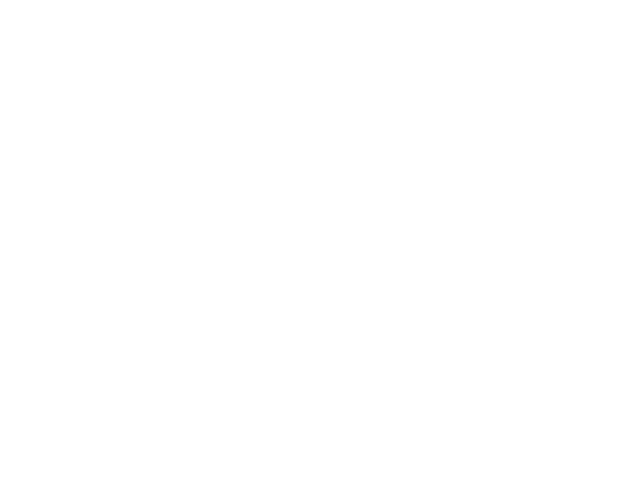

/var/folders/x1/_4_0wf6n3vbb18gn1psjd98w0000gn/T/ipykernel_18232/989734148.py:16: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


In [9]:
## Plotting the Animation

%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
numDataPoints = int(len(m_data["100_xs"][:, 2]) / 3)
line_ani = animation.FuncAnimation(fig, update, interval=15, frames=numDataPoints)

# Saving the Animation
f = r"N_100.gif"
writergif = animation.PillowWriter(fps=10)
line_ani.save(f, writer=writergif);


plt.close()

## Comments and observations

The simulation result provides a deep insight on the theory we explained at the beginning. We see that as times passes come of the masses are scattered around and others remain bound. This behaviour was expected because of the random generated points that were not placed at the exact opposites of the sphere, making it difficult to obtain a collapse in the same $R=0$ point. We can eventually check whether it is correct that the trajectories vary the way we see in the 3D plot. 

## $R$ analysis

Goal: see how the distances oh the masses change over time. Check with the results of the dynamical and free-fall time. 

In [10]:
r_t = {}  # set an array where to store rays at different ts

for i in range(0, N):  
    
    r_t[f"{i}"] = np.sqrt(m_data[f"{i}_xs"][:, 0]**2 + m_data[f"{i}_xs"][:, 1]**2 + m_data[f"{i}_xs"][:, 2]**2)

Let's see how different masses behave depending on their initial $\textit{relative}$ position:

<IPython.core.display.Javascript object>


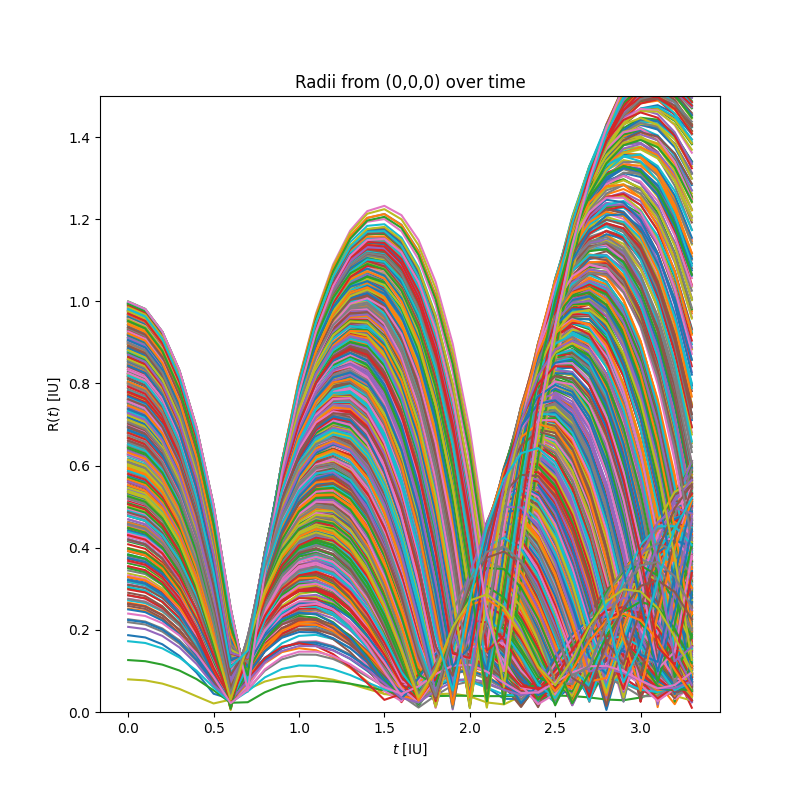

In [11]:
plt.figure(figsize = (8,8))

for i in range(0, N):

    plt.plot(times_plot, r_t[f"{i}"][:], label = f"{i} mass")

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.title("Radii from (0,0,0) over time")
plt.ylim(0, 1.5)
plt.show()

Observation: we noticed that changing the $\epsilon$ value changes the outcome drastically. Indeed, if $\epsilon > 0.5$ we obtain a periodic system, where most of the particles do not scatter outside the bulk (if not all of them). 

## $R_{min}$ analysis

We want to see if the $T_{coll}$ we indicated in the previous notebook is relatable to what we observe in the simulation or not. To do so we first take the sum of the $r$ values, and then we evaluate its minimum. The time $t_{min}$ will be out estimation of the "$\textit{average}$" collapse time found for the masses (e.g. when the majority of masses reaches $R \sim 0$. 

In [12]:
def GetSumRs(): 
    
    for i in range(0, len(times_plot)): 
    
        summation = 0
    
        for j in range(0, N):
        
            summation += r_t[f"{j}"][i]
    
        sum_Rs.append(summation)
        
    return np.array(sum_Rs)

In [13]:
sum_Rs = []
sum_Rs = GetSumRs()

<IPython.core.display.Javascript object>


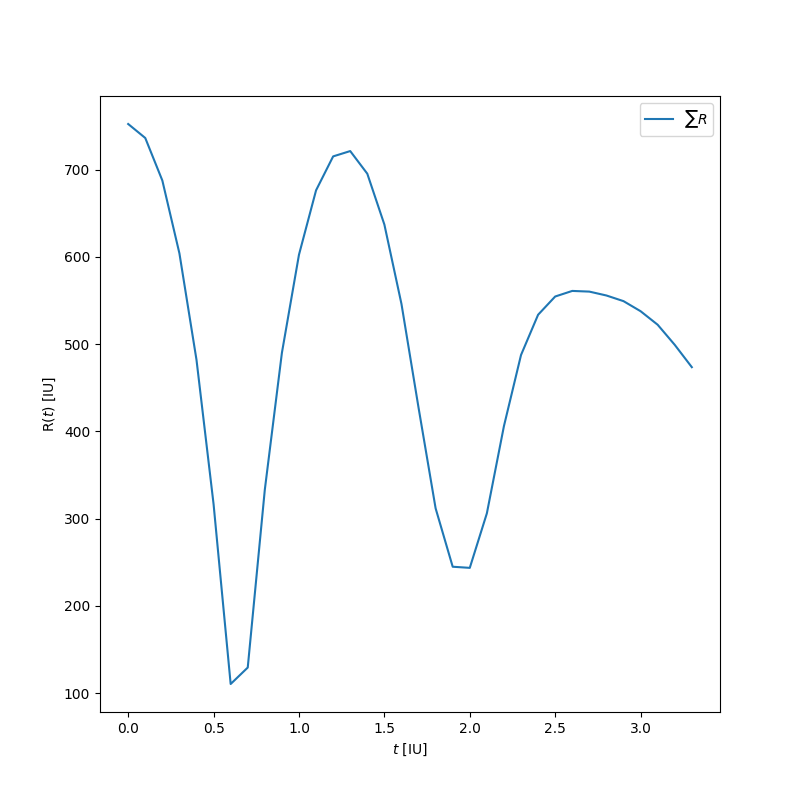

In [14]:
plt.figure(figsize = (8,8))

plt.plot(times_plot, sum_Rs, label = "$\sum R$")

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.legend()
plt.show()

Now let's check the minimum: 

In [15]:
print("sum_R_min: ", sum_Rs.min())
print("t_min: ", times_plot[sum_Rs.argmin()])

sum_R_min:  110.63115674497521
t_min:  0.59999973


For the sake of completeness I here report the value of the $T_{coll}$ we analitically estimated n the other notebook: 

In [16]:
T_coll = 1.1107207345395915
print("T_coll: ", T_coll)

T_coll:  1.1107207345395915


The $\textbf{relative}$ error is roughly estimated as: 

In [17]:
err = np.abs(times_plot[sum_Rs.argmin()] - T_coll) / T_coll
print("rel_err: ", err)

rel_err:  0.45981045339114174


# Analytical solution check: 

From this integral: 
    
$$\frac{dr}{dt} = - \sqrt{2GM_{0}(\frac{1}{r} - \frac{1}{r_{0}})}$$   

We can extract the value of $t$ as a function of $r$: 

$$t = -\sqrt{\frac{3}{{8G\pi\rho_0}}} (\arcsin{\sqrt{\frac{r}{r_0}}} - \sqrt{\frac{r}{r_0}}\sqrt{1 - \frac{r}{r_0}} - \frac{\pi}{2})$$

In [74]:
def T_r(r0, rs, rho0): 
    
    return 3**0.5 / -(8 * np.pi * rho0)**(0.5) * (np.arcsin((rs / r0)**(0.5)) - (rs/r0)**(0.5) * (1 - rs/r0)**(0.5) - np.pi/2)

In [75]:
def r0(m_data): 
    
    return np.sqrt(m_data[0, 0]**2 + m_data[0, 1]**2 + m_data[0, 2]**2)

Here we load the initial data that is needed to evaluate $r_0$: 

In [76]:
fname_init = 'homogeneous_sphere_initial.txt'

In [77]:
data_init = pd.read_csv(fname_init, header=None).to_numpy()

In [78]:
# params:

N = 1000
M = 1 
a = 1
V_sphere = 4/3 * np.pi * a**3
rho0 = M / V_sphere

# take only the paired components every 3N+3 rows
# index 2: times
#index i: masses
# index i + N : positions
#index i + 2N : velocities


m_init = {}

for i in range(3, N + 3): # start from index==2 because we care about m_s, x_s and v_s 
    
    m_init[f"{i}_ms"]= data_init[i::(3 * N + 3)]
    m_init[f"{i}_xs"]= data_init[(i + N)::(3 * N + 3)]
    m_init[f"{i}_vs"]= data_init[(i + 2 * N)::(3 * N + 3)] 

In [79]:
m_data_init = {} # define a dictionary to order variables

for j in range(3, N + 3):

    m_data_init[f"{j - 3}_ms"] = np.array([m_init[f"{j}_ms"][i][0].split() for i in range(0, len(m_init[f"{j}_ms"]))]).astype(float)
    m_data_init[f"{j - 3}_xs"] = np.array([m_init[f"{j}_xs"][i][0].split() for i in range(0, len(m_init[f"{j}_xs"]))]).astype(float)
    m_data_init[f"{j - 3}_vs"] = np.array([m_init[f"{j}_xs"][i][0].split() for i in range(0, len(m_init[f"{j}_vs"]))]).astype(float)
        

In [80]:
# set values to get analytical solution:

r0_s = [r0(m_data_init[f"{j}_xs"]) for j in range(0, N)]

r_s = [np.linspace(0, r0_s[j]) for j in range(0, len(r0_s))]

In [83]:
t_s= [] # evaluate t_s as function of r_s and r_0 and then revert axes

for i in range(0, N): 

    t_s.append(T_r(r0_s[i], r_s[i], rho0))

<IPython.core.display.Javascript object>


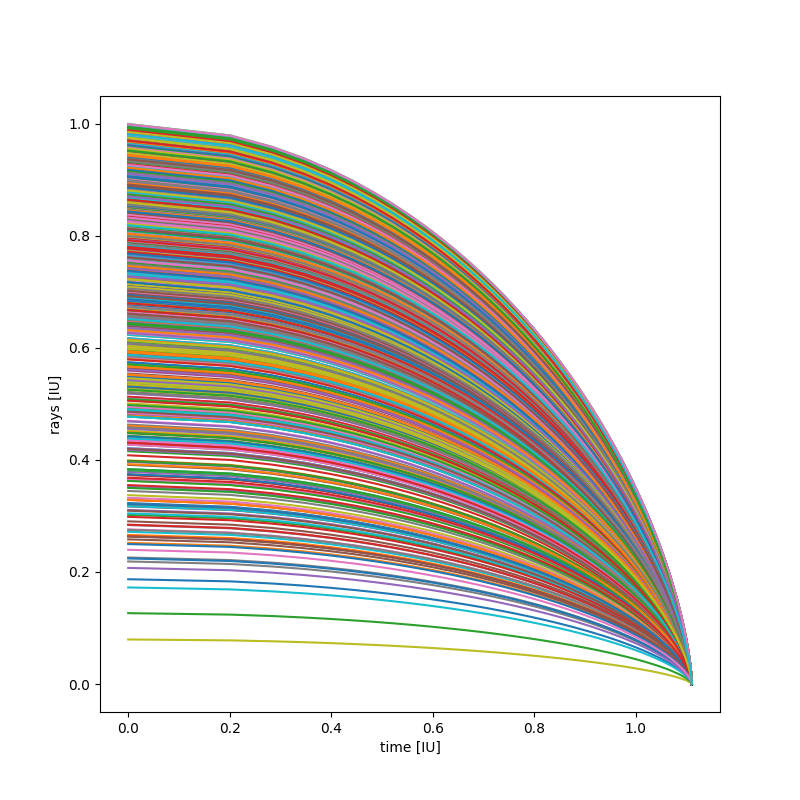

In [84]:
plt.figure(figsize = (8,8))

for i in range(0, len(t_s)):

    plt.plot(t_s[i], r_s[i]) # revert axes to get r(t)
    
plt.xlabel("time [IU]")
plt.ylabel("rays [IU]")
    
plt.show();